In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.decomposition import PCA

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
data = []
data_img = []
data_gray = []
data_red = []
data_green = []
data_blue = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        try:
            image = cv.imread(os.path.join(dirname, filename), cv.IMREAD_COLOR)
            image1 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            gray_image = cv.resize(gray_image,(100,100))
#             gray_image = gray_image.flatten()
            data_gray.append(gray_image)
            image2 = cv.resize(image1,(100,100))
            data_img.append(image2)
            red,green,blue = cv.split(image2)
            image3 = image2.flatten()
            red = red.flatten()
            green = green.flatten()
            blue = blue.flatten()
            data.append(image3)
            data_red.append(red)
            data_green.append(green)
            data_blue.append(blue)
        except:
            print("Empty File!!!")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Empty File!!!
Empty File!!!


In [22]:
data=np.array(data)
df =pd.DataFrame(data)
dfr =pd.DataFrame(data_red)
dfg =pd.DataFrame(data_green)
dfb =pd.DataFrame(data_blue)
imgs=np.asarray(data_img)
df

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,136,80,73,122,77,66,80,64,46,51,...,67,77,104,60,70,97,55,64,89,49
1,83,107,63,95,118,75,140,156,104,110,...,55,81,130,58,74,114,50,46,82,37
2,59,89,53,55,86,45,54,85,43,54,...,77,77,102,74,73,100,70,66,93,63
3,53,76,55,53,77,56,53,77,56,54,...,41,45,72,42,50,78,46,48,75,44
4,64,82,48,72,87,59,78,90,58,97,...,33,51,68,36,54,72,40,58,75,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,37,91,33,35,83,30,33,78,29,31,...,141,173,217,153,174,218,150,161,210,132
809,223,254,147,199,242,127,168,217,110,147,...,79,71,125,76,66,122,67,66,122,62
810,32,52,19,37,54,23,41,58,25,43,...,68,61,74,44,75,96,52,73,92,50
811,5,5,5,5,5,5,3,3,3,3,...,2,2,2,2,3,3,3,8,8,8


(30000,)

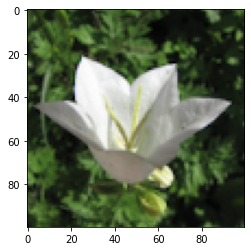

In [23]:
plt.imshow(data[50].reshape([100,100,3]))
# np.shape(data)
# data2 = np.reshape(data,(346800,3612))
np.shape(data_img[0])
# plt.imshow(data_img[60])

In [35]:
# np.seterr(invalid='ignore')
pca_orig_dims = PCA(650)

data_comp_r = pca_orig_dims.fit_transform(dfr)
data_recov_r = pca_orig_dims.inverse_transform(data_comp_r)

data_comp_g = pca_orig_dims.fit_transform(dfg)
data_recov_g = pca_orig_dims.inverse_transform(data_comp_g)

data_comp_b = pca_orig_dims.fit_transform(dfb)
data_recov_b = pca_orig_dims.inverse_transform(data_comp_b)

# plt.grid()
# plt.plot(pca_orig_dims.explained_variance_ratio_ * 100,(1,814))
# plt.xlabel('Number of components')
# plt.ylabel('Explained variance')
# plt.savefig('Scree plot.png')

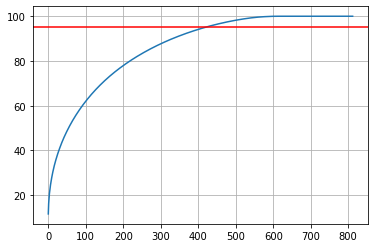

In [25]:
plt.grid()
plt.plot(np.cumsum(pca_orig_dims.explained_variance_ratio_*100))
plt.axhline(95,color='red')

In [36]:
img_compressed = (np.dstack((data_recov_r, data_recov_g, data_recov_b))).astype(np.uint8)

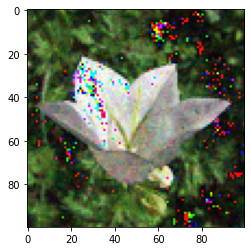

In [28]:
plt.imshow(img_compressed[50].reshape([100,100,3]))

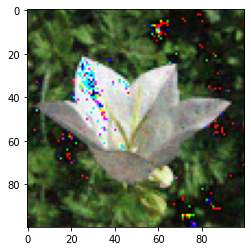

In [31]:
plt.imshow(img_compressed[50].reshape([100,100,3]))

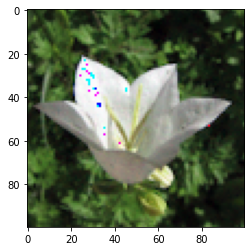

In [34]:
plt.imshow(img_compressed[50].reshape([100,100,3]))

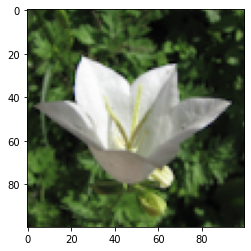

In [37]:
plt.imshow(img_compressed[50].reshape([100,100,3]))

In [ ]:
plt.imshow(data_gray[60].reshape([28,28]))

In [4]:
from sklearn.model_selection import train_test_split
data_img = np.array(data)
np.shape(data)
x_train, x_test = train_test_split(data,train_size=0.8, shuffle=True)
x_train = np.array(x_train)/255
x_test = np.array(x_test)/255
# x_train = x_train.reshape(-1,28,28,3)
# plt.imshow(np.reshape(test[0],(50,50,3)))
np.shape(x_train[0])
# type(train)



(30000,)

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()
model.add(Dense(10000, input_dim=30000, activation='relu'))
model.add(Dense(1200, activation='relu'))
# model.add(Dense(800, activation='relu'))
model.add(Dense(200, activation='relu'))
# model.add(Dense(800, activation='relu'))
model.add(Dense(1200, activation='relu'))
model.add(Dense(10000, activation='relu'))
model.add(Dense(30000, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adamax')

2022-12-24 19:06:14.063461: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-24 19:06:14.213816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-24 19:06:14.214893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-24 19:06:14.216870: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
model.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=500, batch_size=64)

2022-12-24 19:06:17.180520: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
11/11 [==============================] - 3s 117ms/step - loss: 0.0818 - val_loss: 0.0659
Epoch 2/500
11/11 [==============================] - 1s 95ms/step - loss: 0.0582 - val_loss: 0.0571
Epoch 3/500
11/11 [==============================] - 1s 93ms/step - loss: 0.0539 - val_loss: 0.0530
Epoch 4/500
11/11 [==============================] - 1s 92ms/step - loss: 0.0501 - val_loss: 0.0498
Epoch 5/500
11/11 [==============================] - 1s 93ms/step - loss: 0.0479 - val_loss: 0.0486
Epoch 6/500
11/11 [==============================] - 1s 92ms/step - loss: 0.0470 - val_loss: 0.0478
Epoch 7/500
11/11 [==============================] - 1s 92ms/step - loss: 0.0460 - val_loss: 0.0477
Epoch 8/500
11/11 [==============================] - 1s 91ms/step - loss: 0.0453 - val_loss: 0.0462
Epoch 9/500
11/11 [==============================] - 1s 92ms/step - loss: 0.0441 - val_loss: 0.0461
Epoch 10/500
11/11 [==============================] - 1s 93ms/step - loss: 0.0435 - val_loss: 0.044

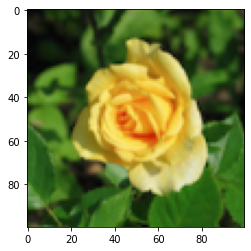

In [38]:
plt.imshow(np.reshape(x_test[50],(100,100,3)))

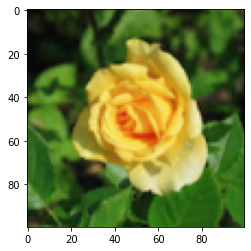

In [39]:
decoded_imgs = model.predict(x_test)
plt.imshow(np.reshape(decoded_imgs[50],(100,100,3)))

In [40]:
print(np.mean(decoded_imgs))
d2 = model.predict(x_train)
print(np.mean(d2))

0.39268687
0.39045057
